# Looking at pretrained models 

In [9]:
import csv

with open('/Users/jason/Documents/models.tsv', mode='r') as fh:
    reader = csv.reader(fh, delimiter='\t')
    model_data = list((name, float(top1_err), float(top5_err)) for name, top1_err, top5_err in reader)

model_data

[('AlexNet', 43.45, 20.91),
 ('VGG-11', 30.98, 11.37),
 ('VGG-13', 30.07, 10.75),
 ('VGG-16', 28.41, 9.62),
 ('VGG-19', 27.62, 9.12),
 ('VGG-11 with batch normalization', 29.62, 10.19),
 ('VGG-13 with batch normalization', 28.45, 9.63),
 ('VGG-16 with batch normalization', 26.63, 8.5),
 ('VGG-19 with batch normalization', 25.76, 8.15),
 ('ResNet-18', 30.24, 10.92),
 ('ResNet-34', 26.7, 8.58),
 ('ResNet-50', 23.85, 7.13),
 ('ResNet-101', 22.63, 6.44),
 ('ResNet-152', 21.69, 5.94),
 ('SqueezeNet 1.0', 41.9, 19.58),
 ('SqueezeNet 1.1', 41.81, 19.38),
 ('Densenet-121', 25.35, 7.83),
 ('Densenet-169', 24.0, 7.0),
 ('Densenet-201', 22.8, 6.43),
 ('Densenet-161', 22.35, 6.2),
 ('Inception v3', 22.55, 6.44),
 ('GoogleNet', 30.22, 10.47),
 ('ShuffleNet V2', 30.64, 11.68),
 ('MobileNet V2', 28.12, 9.71),
 ('ResNeXt-50-32x4d', 22.38, 6.3),
 ('ResNeXt-101-32x8d', 20.69, 5.47),
 ('Wide ResNet-50-2', 21.49, 5.91),
 ('Wide ResNet-101-2', 21.16, 5.72),
 ('MNASNet 1.0', 26.49, 8.456)]

In [15]:
# Best models by Top-1 error
top1_models = sorted(model_data, key=lambda tup: tup[1], reverse=False)[:10]
top1_models

[('ResNeXt-101-32x8d', 20.69, 5.47),
 ('Wide ResNet-101-2', 21.16, 5.72),
 ('Wide ResNet-50-2', 21.49, 5.91),
 ('ResNet-152', 21.69, 5.94),
 ('Densenet-161', 22.35, 6.2),
 ('ResNeXt-50-32x4d', 22.38, 6.3),
 ('Inception v3', 22.55, 6.44),
 ('ResNet-101', 22.63, 6.44),
 ('Densenet-201', 22.8, 6.43),
 ('ResNet-50', 23.85, 7.13)]

In [17]:
# Best models by Top-5 error
top5_models = sorted(model_data, key=lambda tup: tup[2], reverse=False)[:10]
top5_models

[('ResNeXt-101-32x8d', 20.69, 5.47),
 ('Wide ResNet-101-2', 21.16, 5.72),
 ('Wide ResNet-50-2', 21.49, 5.91),
 ('ResNet-152', 21.69, 5.94),
 ('Densenet-161', 22.35, 6.2),
 ('ResNeXt-50-32x4d', 22.38, 6.3),
 ('Densenet-201', 22.8, 6.43),
 ('ResNet-101', 22.63, 6.44),
 ('Inception v3', 22.55, 6.44),
 ('Densenet-169', 24.0, 7.0)]

In [18]:
# Common models
set(name for name, _, _ in top1_models) & set(name for name, _, _ in top5_models)

{'Densenet-161',
 'Densenet-201',
 'Inception v3',
 'ResNeXt-101-32x8d',
 'ResNeXt-50-32x4d',
 'ResNet-101',
 'ResNet-152',
 'Wide ResNet-101-2',
 'Wide ResNet-50-2'}

# Data

In [24]:
from PIL import Image

img = Image.open('/Users/jason/Documents/cat_img.jpg')

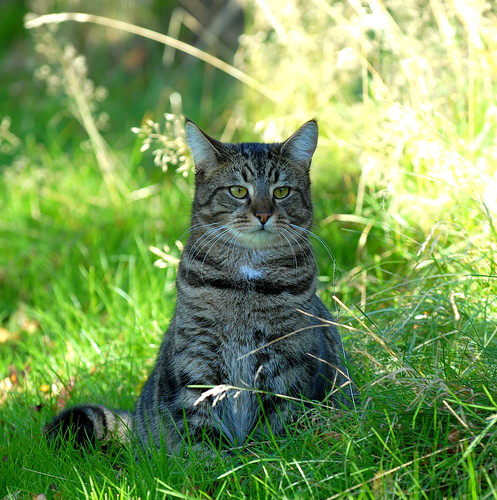

In [89]:
img

In [126]:
from torchvision import models


ALL_MODELS = [models.densenet161(pretrained=True),
              models.densenet201(pretrained=True),
              models.resnext50_32x4d(pretrained=True),
              models.resnext101_32x8d(pretrained=True),
              models.resnet101(pretrained=True),
              models.resnet152(pretrained=True),
              models.wide_resnet50_2(pretrained=True),
              models.wide_resnet101_2(pretrained=True),
              models.vgg19_bn(pretrained=True),
              models.vgg16_bn(pretrained=True)]

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /Users/jason/.cache/torch/checkpoints/resnext50_32x4d-7cdf4587.pth
84.7%Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /Users/jason/.cache/torch/checkpoints/resnext101_32x8d-8ba56ff5.pth
100.0%
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /Users/jason/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
97.1%Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /Users/jason/.cache/torch/checkpoints/resnet152-b121ed2d.pth
97.1%Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /Users/jason/.cache/torch/checkpoints/wide_resnet50_2-95faca4d.pth
100.0%
Downloading: "https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth" to /Users/jason/.cache/torch/checkpoints/wide_resnet101_2-32ee1156.pth
100.0%
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /Users/j

In [128]:
from torchvision import transforms
import torch

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

img_after = preprocess(img)
img_after.unsqueeze_(0)
print('Img size: {}'.format(img_after.size()))

for idx, model in enumerate(ALL_MODELS):
    model.eval()
    
    logits = model(img_after)
    assert torch.topk(logits, k=1)[1][0][0] == 282
    
    print('Model {}:'.format(idx))
    if idx < 2:
        layers = model.features
    elif idx < 8:
        layers = torch.nn.Sequential(model.conv1, model.bn1, model.relu, model.maxpool,
                  model.layer1, model.layer2, model.layer3, model.layer4,
                  model.avgpool)
    else:
        layers = model.features

    for i in range(len(layers)):
        model_prefix = layers[:i+1]
        print('\t{}: {}'.format(i+1, model_prefix(img_after).size()))
    
    print()

Img size: torch.Size([1, 3, 225, 224])
Model 0:
	1: torch.Size([1, 96, 113, 112])
	2: torch.Size([1, 96, 113, 112])
	3: torch.Size([1, 96, 113, 112])
	4: torch.Size([1, 96, 57, 56])
	5: torch.Size([1, 384, 57, 56])
	6: torch.Size([1, 192, 28, 28])
	7: torch.Size([1, 768, 28, 28])
	8: torch.Size([1, 384, 14, 14])
	9: torch.Size([1, 2112, 14, 14])
	10: torch.Size([1, 1056, 7, 7])
	11: torch.Size([1, 2208, 7, 7])
	12: torch.Size([1, 2208, 7, 7])

Model 1:
	1: torch.Size([1, 64, 113, 112])
	2: torch.Size([1, 64, 113, 112])
	3: torch.Size([1, 64, 113, 112])
	4: torch.Size([1, 64, 57, 56])
	5: torch.Size([1, 256, 57, 56])
	6: torch.Size([1, 128, 28, 28])
	7: torch.Size([1, 512, 28, 28])
	8: torch.Size([1, 256, 14, 14])
	9: torch.Size([1, 1792, 14, 14])
	10: torch.Size([1, 896, 7, 7])
	11: torch.Size([1, 1920, 7, 7])
	12: torch.Size([1, 1920, 7, 7])

Model 2:
	1: torch.Size([1, 64, 113, 112])
	2: torch.Size([1, 64, 113, 112])
	3: torch.Size([1, 64, 113, 112])
	4: torch.Size([1, 64, 57, 56])
	